In [10]:
import sys
# MC: need to specify path to remo in notebook
local_path_to_repo =  '/Users/melodi/Documents/GitHub/remo-python'

sys.path.insert(0, local_path_to_repo)

In [11]:
%load_ext autoreload
%autoreload 2
import remo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create and visualize a dataset


In [15]:
my_dataset = remo.create_dataset(name = 'test 5',  paths_to_upload = ['/Users/melodi/Documents/Remo/data'], annotation_task = "Image classification")


{'id': 6, 'name': 'test 5', 'annotation_sets': [], 'created_at': '2019-12-20T09:26:38.784120Z', 'license': None, 'is_public': False, 'users_shared': [], 'top3_classes': [], 'total_classes': 0, 'total_annotation_objects': 0}
Progress 100% - 3/3 - elapsed 0:00:00.001000 - speed: 3000.00 img / s, ETA: 0:00:00


In [13]:
import pandas as pd
df = pd.read_csv('/Users/melodi/Documents/Remo/data/plain_img_class.csv')

In [14]:
df

,file_name,class_name
0,0001eeaf4aed83f9.jpg,/m/0cmf2
1,000595fe6fee6369.jpg,/m/02wbm
2,000595fe6fee6369.jpg,/m/02xwb
3,000595fe6fee6369.jpg,/m/02xwb
4,000595fe6fee6369.jpg,/m/02xwb
5,000595fe6fee6369.jpg,/m/02xwb
6,000595fe6fee6369.jpg,/m/02xwb
7,000595fe6fee6369.jpg,/m/02xwb
8,000595fe6fee6369.jpg,/m/02xwb




We can now visualize the dataset - this will open the UI in a separate window:

In [10]:
my_dataset.view()

Open http://localhost:8000/datasets/5


In [5]:
my_dataset.export_annotation_to_csv('ann.csv')

In [10]:
my_dataset.annotations[0]

{'file_name': '0004d295cfb46842.jpg',
 'height': 680,
 'width': 1024,
 'tags': [],
 'task': 'Object detection',
 'annotations': [{'classes': ['Car'],
   'bbox': {'xmin': 0.0,
    'ymin': 427.72136000000006,
    'xmax': 46.72,
    'ymax': 456.535}},
  {'classes': ['Car'],
   'bbox': {'xmin': 3.84,
    'ymin': 407.87216,
    'xmax': 24.96,
    'ymax': 427.72136000000006}},
  {'classes': ['Car'],
   'bbox': {'xmin': 57.6, 'ymin': 412.9946, 'xmax': 82.56, 'ymax': 435.40468}},
  {'classes': ['Car'],
   'bbox': {'xmin': 157.44,
    'ymin': 412.9946,
    'xmax': 261.12,
    'ymax': 452.05244000000005}},
  {'classes': ['Car'],
   'bbox': {'xmin': 556.16,
    'ymin': 420.67792000000003,
    'xmax': 670.08,
    'ymax': 473.18276}},
  {'classes': ['Car'],
   'bbox': {'xmin': 744.96,
    'ymin': 429.0018,
    'xmax': 933.76,
    'ymax': 498.1544}},
  {'classes': ['Car'],
   'bbox': {'xmin': 846.08,
    'ymin': 407.87216,
    'xmax': 880.0,
    'ymax': 429.0018}},
  {'classes': ['Building'],
   'bb

## List Datasets & Explore Annotations

In [3]:
remo.list_datasets()

[Dataset 1 - 'test 2',
 Dataset 2 - 'test 3',
 Dataset 3 - 'test 4',
 Dataset 4 - 'test 4',
 Dataset 5 - 'test 4',
 Dataset 6 - 'test 5']

In [12]:
dataset = remo.get_dataset(6)

In [17]:
dataset.view_annotation_statistics()

Open http://localhost:8000/annotation-detail/2/intro


In [14]:
dataset.list_annotation_sets()

[Annotation set 2 - 'Image classification', task: Image classification, #classes: 3,
 Annotation set 3 - 'Alternative Classification', task: Image classification, #classes: 2,
 Annotation set 5 - 'Copy Image classification', task: Image classification, #classes: 3]

In [16]:
remo.view_annotation_stats(3)

Open http://localhost:8000/annotation-detail/3/intro


In [9]:
dataset.default_annotation_set.get_annotations()


[{'file_name': '0001eeaf4aed83f9.jpg',
  'height': 184,
  'width': 276,
  'tags': [],
  'task': 'Image classification',
  'classes': ['Airplane', 'Fruit', 'Food']},
 {'file_name': '000595fe6fee6369.jpg',
  'height': 184,
  'width': 276,
  'tags': [],
  'task': 'Image classification',
  'classes': ['Food', 'Fruit']}]

In [7]:
dataset.view()

Open http://localhost:8000/datasets/6


In [4]:
dataset.list_classes()

[{'name': 'Fruit',
  'objects_per_image': 'N/A',
  'total_annotation_objects': 0,
  'total_images': 2},
 {'name': 'Food',
  'objects_per_image': 'N/A',
  'total_annotation_objects': 0,
  'total_images': 2},
 {'name': 'Airplane',
  'objects_per_image': 'N/A',
  'total_annotation_objects': 0,
  'total_images': 1}]

In [10]:
dataset.annotation_sets

[Annotation set 2 - 'Image classification', task: Image classification, #classes: 3,
 Annotation set 3 - 'Alternative Classification', task: Image classification, #classes: 2]

In [14]:
dataset.view_image(dataset.images[0].id)

Open http://localhost:8000/image/7?datasetId=6


We can also list classes of other annotation sets we have for our dataset by passing annotation set id.

In [5]:
dataset.list_classes(annotation_set_id=3)

[{'name': 'Grape',
  'objects_per_image': 'N/A',
  'total_annotation_objects': 0,
  'total_images': 1},
 {'name': 'Airplane',
  'objects_per_image': 'N/A',
  'total_annotation_objects': 0,
  'total_images': 1}]

In [12]:
dataset.view_annotate()

Open http://localhost:8000/annotation/2


## Train-Test Split

In [11]:
my_dataset.annotation_sets

[Annotation set 17 - 'Object detection', task: Object detection, #classes: 2]

In [12]:
my_dataset = remo.get_dataset(25)

In [13]:
len(my_dataset)

197

In [14]:
my_dataset.view()

Open http://localhost:8000/datasets/25


In [15]:
my_dataset

Dataset 25 - 'open images data'

In [ ]:
my_dataset.add_data(paths_to_upload = ['sample_data'],
                    annotation_task = "Object detection")

Progress 13% - 27/198 - elapsed 0:00:34.001000 - speed: 0.79 img / s, ETA: 0:03:35.339667
Progress 26% - 52/198 - elapsed 0:01:05.001000 - speed: 0.80 img / s, ETA: 0:03:02.502808
Progress 37% - 74/198 - elapsed 0:01:32.001000 - speed: 0.80 img / s, ETA: 0:02:34.163838
Progress 49% - 98/198 - elapsed 0:01:58.001000 - speed: 0.83 img / s, ETA: 0:02:00.409184


In [16]:
test = my_dataset[0:len(my_dataset)//3]

In [17]:
train = my_dataset[len(my_dataset)//3:]

In [18]:
len(test)

65

In [19]:
len(train)

132

In [22]:
test.annotations[:2]

[{'file_name': '0013b65ae5b1a2c9.jpg',
  'height': 768,
  'width': 1024,
  'tags': [],
  'task': 'Object detection',
  'annotations': [{'classes': ['Car'],
    'bbox': {'xmin': 60.16, 'ymin': 216.96, 'xmax': 816.0, 'ymax': 504.96}}]},
 {'file_name': '004a86ae32a121ab.jpg',
  'height': 813,
  'width': 1024,
  'tags': [],
  'task': 'Object detection',
  'annotations': [{'classes': ['Car'],
    'bbox': {'xmin': 8.96,
     'ymin': 279.748422,
     'xmax': 723.84,
     'ymax': 777.7914089999999}},
   {'classes': ['Car'],
    'bbox': {'xmin': 786.56,
     'ymin': 402.659388,
     'xmax': 839.68,
     'ymax': 434.66719800000004}}]}]

In [24]:
test.images[:2]

In [25]:
test.export_annotation_to_csv('test_sample.csv')

In [26]:
import pandas as pd
df = pd.read_csv('test_sample.csv')

In [27]:
df.head()

,file_name,class,xmin,ymin,xmax,ymax
0,0013b65ae5b1a2c9.jpg,Car,60.16,216.960000,816.00,504.960000
1,004a86ae32a121ab.jpg,Car,8.96,279.748422,723.84,777.791409
2,004a86ae32a121ab.jpg,Car,786.56,402.659388,839.68,434.667198
3,007741a1be3f3280.jpg,Car,0.00,294.399744,1022.72,766.719744
4,007741a1be3f3280.jpg,Car,10.24,316.160256,153.60,368.640000


In [28]:
test.view_image(test.images[0].id)

Open http://localhost:8000/image/2283?datasetId=25


In [30]:
test.list_images(limit=5)

[{'id': 2283, 'name': '07e36613d79f5cc0.jpg'},
 {'id': 2284, 'name': '07b102540742adc5.jpg'},
 {'id': 2285, 'name': '0e455d20edea1228.jpg'},
 {'id': 2286, 'name': '09451560f37c7a31.jpg'},
 {'id': 2287, 'name': '0a45aa66eb78e5cd.jpg'}]

## Create Subset By Search

In [20]:
dataset.annotations

[{'file_name': '0001eeaf4aed83f9.jpg',
  'height': 184,
  'width': 276,
  'tags': [],
  'task': 'Image classification',
  'classes': ['Airplane']},
 {'file_name': '000595fe6fee6369.jpg',
  'height': 184,
  'width': 276,
  'tags': [],
  'task': 'Image classification',
  'classes': ['Food', 'Fruit']}]

In [7]:
dataset.list_images()

[{'id': 7, 'name': '0001eeaf4aed83f9.jpg'},
 {'id': 8, 'name': '000595fe6fee6369.jpg'}]

In [8]:
filtered_dataset = dataset.search('Airplane', 'Image classification')

In [9]:
filtered_dataset.list_images()

[{'id': 7, 'name': '0001eeaf4aed83f9.jpg'}]

In [10]:
filtered_dataset.images[0].name

'0001eeaf4aed83f9.jpg'

In [11]:
len(filtered_dataset)

1

In [13]:
filtered_dataset.view_image(7)

Open http://localhost:8000/image/7?datasetId=6


In [47]:
filtered_dataset.images[0].id

7

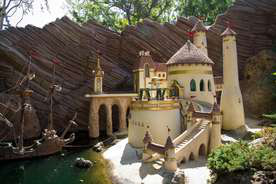

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
Image.open(filtered_dataset.get_images_by_id(7))

In [57]:
filtered_dataset.view()

Open http://localhost:8000/datasets/6


Now, let's create a new dataset with our filtered results.

In [55]:

import os
from shutil import copyfile

def prepare_filtered_files_by_remo(filtered_dataset, root='/Users/melodi/Documents/GitHub/remo-python/example'):
    """
    Given subset and root path retrieves images and annotations from Remo and saves locally
    to create dataset in Remo with the arrangement given below:
        root/subset/images/xxx.ext
        root/subset/sub_annotation.csv
    Args:
        filtered_dataset: Remo dataset
        root: string. Root directory path.
    """
    new_path = os.path.join(root, 'subset/images')
    if not os.path.exists(new_path):
        os.makedirs(new_path)
        
    annotation_path = os.path.join(root, 'subset/sub_annotation.csv')
    filtered_dataset.export_annotation_to_csv(annotation_path)
   
    for im in filtered_dataset.images:
        img = Image.open(filtered_dataset.get_images_by_id(im.id))
        img.save(os.path.join(new_path, im.name))
   
    

In [56]:
prepare_filtered_files_by_remo(filtered_dataset)

In [38]:

import os
from shutil import copyfile

def prepare_filtered_files_by_local(filtered_dataset, images_source_path='/Users/melodi/Documents/Remo/data/images', root='/Users/melodi/Documents/GitHub/remo-python/example'):
    """
    Given subset and root path arranges images and annotations to create dataset in Remo as below:
        root/subset/images/xxx.ext
        root/subset/sub_annotation.csv
    Args:
        filtered_dataset: Remo dataset
        image_source_path: Directory that contains images locally.
        root: string. Root directory path.
    """
    new_path = os.path.join(root, 'subset/images')
    if not os.path.exists(new_path):
        os.makedirs(new_path)
        
    annotation_path = os.path.join(root, 'subset/sub_annotation.csv')
    filtered_dataset.export_annotation_to_csv(annotation_path)
   
    for im in filtered_dataset.images:
        copyfile(os.path.join(images_source_path, im.name), os.path.join(new_path, im.name))
   
    

In [39]:
prepare_filtered_files_by_local(filtered_dataset)

In [40]:
new_dataset = remo.create_dataset(name = 'Airplane dataset',  paths_to_upload = ['/Users/melodi/Documents/GitHub/remo-python/example/subset'], annotation_task = "Image classification")

{'id': 7, 'name': 'Airplane dataset', 'annotation_sets': [], 'created_at': '2019-12-23T13:58:16.698593Z', 'license': None, 'is_public': False, 'users_shared': [], 'top3_classes': [], 'total_classes': 0, 'total_annotation_objects': 0}
Progress 100% - 2/2 - elapsed 0:00:00.001000 - speed: 2000.00 img / s, ETA: 0:00:00


In [41]:
new_dataset.view()

Open http://localhost:8000/datasets/7


In [42]:
new_dataset.view_annotate()

Open http://localhost:8000/annotation/4
